#### Basic classificator: 

$\Phi(z)$

$z = \sum_{j=0}^{m}x_jw_j= w^Tx$

Где $x_j$ = переменные,
    $w_j$ = веса, а 
    $T$ = обозначение транспонирования матрицы
    
#### Дополнительные материалы по алгебре

1. «Обзор линейной алгебры со справочнико.м» (Linear Algebra Review and Reference) от Зико Кольтера, который на­ ходится в свободном доступе по прямой ссылке https://www.cs.cmu.edu/~zkolter/course/linalg/course_notes.html
2. В русскоязычном сегменте можно обратиться к лекциям Пано­ ва Т.Е. «Линейная алгебра и геометрия» (http://higeom.math.msu.su/people/taras/teaching/2012/panov-linalg2012.pdf)
3. Тыртышникова Е. Е. «Матричный анализ и линейная алгебра» (http://www.inm.ras.ru/vtm/lection/all.pdf).


### Работа персептрона
>Весь смысл идеи, лежащей в основе нейрона МСР и персептронной модели Розенблатта с порогом, состоит в том, чтобы использовать редукционистский подход для имитации работы отдельного нейрона головного мозга: он либо ативируется, либо нет.

1. Инициализировать веса нулями либо малыми случайными числами.
2. Для каждого тренировочного образца $x^{(i)}$ выполнить следующие шаги:
 - вычислить выходное значение $\hat{y}$;
 - обновить веса
 
*$\hat{y}$ обозначается оцененная переменная*

Обновление веса можно в формально записать как: 
$w_j:=w_j+\Delta{w_j}$

Правило обучения персептрона
$\Delta{w_j} = \eta(y^{(i)} - \hat{y}^{(i)})x_j^{(i)}$

$\eta$ = это темп обучения, константа $\in [0;1]$

В данном случае, чтобы персептрон мог подобрать веса - точки должны быть линейно разделимы, иначе персептрон зациклится. Если классы неразделимы линейно - мы можем задать ограничение по количеству эпох (циклов обновления весов) или задать порг на допустимое число ошибочных классификаций

##### Принцип работы персептрона

![alt text](perceptron_workflow.png "Принцип работы персептрона")

In [39]:
import numpy as np 

class Perceptron:
    """
    Classificator based on perceptron 
    """
    
    eta: float  # Training tempo
    n_iter: int # Number of training iterations
        
   
    w_ : np.ndarray # Function weights
    erros_ : list   # Number of misclassifications
        
    def __init__(self, eta=0.01, n_iter=10) -> None:
        self.eta = eta 
        self.n_iter = n_iter
        
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """ 
        X: training vectors, X = [n_samples, n_features] 
        y: target values, Y = [n_samples]
        
        Return self object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0 
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi 
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X: np.ndarray) -> np.ndarray:
        """ 
        Calculate net input function
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

In [40]:
import pandas as pd 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header = None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


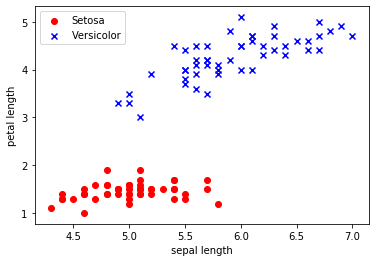

In [41]:
import matplotlib.pyplot as plt 

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='Versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

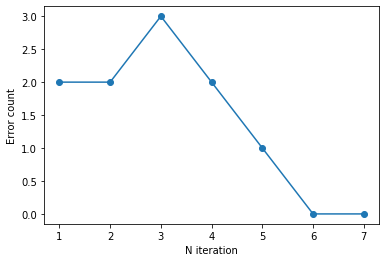

In [42]:
ppn = Perceptron(eta=0.1, n_iter=7)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.ylabel('Error count')
plt.xlabel('N iteration')
plt.show()

## Vizualization of classification 

### Meshrid 

Function to create coordinate matrices from coordinate vectors:

[Meshgrid documentation](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)

#### How it works: 

![alt text](how_meshgrid.png "Meshgrid")


In [43]:
xvalues = np.array([0, 1, 2, 3, 4])
yvalues = np.array([0, 1, 2, 3, 4])
xx, yy = np.meshgrid(xvalues, yvalues) 

In [44]:
print(f'{xx} \n\n {yy}')

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]] 

 [[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]


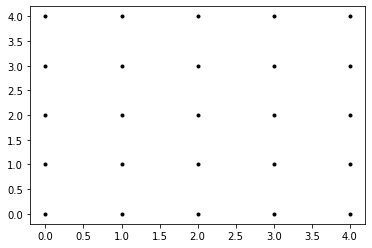

In [45]:
plt.plot(xx, yy, marker='.', color='k', linestyle='none') 

In [46]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X: np.ndarray, y: np.ndarray, classifier: object, resolution=0.02) -> None:
    #generate markers and colors
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1 
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], 
                    alpha=0.8 , c=cmap(idx), 
                    marker=markers[idx], label=cl)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


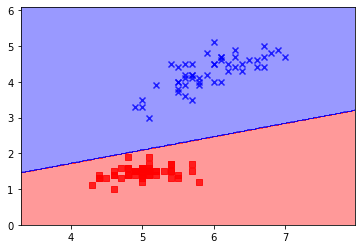

In [47]:
plot_decision_regions(X, y, ppn)